<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# Проект «Анализ вакансий из HeadHunter»
   

In [1]:
import pandas as pd
import psycopg2

In [2]:
# параметры подключения скрыты

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

## 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в базе (вакансии находятся в таблице `vacancies`).

In [4]:
# текст запроса
query_3_1 = f'''
SELECT 
    COUNT(*) AS count_id  -- Подсчитываем количество всех строк в таблице
FROM
    vacancies  -- Таблица, в которой находятся вакансии

'''
# Выполнение запроса и сохранение результата в DataFrame
df_3_1 = pd.read_sql_query(query_3_1, connection)
# Выводим общее количество вакансий в базе
print(f'Всего вакансий в базе - {df_3_1.iloc[0, 0]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/922322903.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_1 = pd.read_sql_query(query_3_1, connection)


Всего вакансий в базе - 49197


**Результат запроса:**

- Всего вакансий в базе - **49 197**

2. Напишите запрос, который посчитает количество работодателей (таблица `employers`).

In [5]:
# текст запроса
query_3_2 = f'''
SELECT 
    COUNT(id) AS count_id  -- Подсчитываем количество записей по столбцу id
FROM
    employers
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_3_2 = pd.read_sql_query(query_3_2, connection)
# Выводим общее количество работодателей
print(f'Всего работодателей в базе - {df_3_2.iloc[0, 0]}')

Всего работодателей в базе - 23501


/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/1114410602.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_2 = pd.read_sql_query(query_3_2, connection)


**Результат запроса:**

- Всего работодателей в базе - **23501**

3. Посчитайте с помощью запроса количество регионов (таблица `areas`).

In [6]:
# текст запроса
query_3_3 = f'''
SELECT 
    COUNT(id) AS count_id  -- Подсчитываем количество записей по столбцу id
FROM
    areas
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_3_3 = pd.read_sql_query(query_3_3, connection)
# Выводим общее количество регионов
print(f'Всего регионов в базе - {df_3_3.iloc[0, 0]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/2261865300.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_3 = pd.read_sql_query(query_3_3, connection)


Всего регионов в базе - 1362


**Результат запроса:**

- Всего регионов в базе - **1362**

4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица `industries`).

In [7]:
# текст запроса
query_3_4 = f'''
SELECT 
    COUNT(id) AS count_id  -- Подсчитываем количество записей по столбцу id
FROM
    industries
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_3_4 = pd.read_sql_query(query_3_4, connection)
# Выводим общее количество сфер деятельности
print(f'Всего сфер деятельности в базе - {df_3_4.iloc[0, 0]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/922175300.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_4 = pd.read_sql_query(query_3_4, connection)


Всего сфер деятельности в базе - 294


**Результат запроса:**

- Всего сфер деятельности в базе - **294**

***

## **Выводы** по предварительному анализу данных:

- В базе данных содержится **49 197 вакансий** - достаточно широкий выбор предложений для соискателей;
- Зарегистрировано **23 501 работодателей**;
- В базе данных представлены вакансии из **1 362 регионов**, что дает представление о широком географическом охвате;
- В базе содержится информация о **294 сферах деятельности**, что отражает разнообразие областей для трудоустройства.

## 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (`cnt`) вакансий в каждом регионе (`area`).
Отсортируйте по количеству вакансий в порядке убывания.

In [8]:
# текст запроса
query_4_1 = f'''
SELECT
    a.name,               -- Название региона
    COUNT(v.id) AS cnt    -- Количество вакансий в каждом регионе
FROM
    areas AS a
JOIN
    vacancies AS v ON a.id = v.area_id
GROUP BY a.id             -- Группируем по регионам
ORDER BY cnt DESC         -- Сортировка по количеству вакансий в порядке убывания
LIMIT 5                   -- Ограничиваем вывод 5 регионами (Пятёрка лидеров)
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_4_1 = pd.read_sql_query(query_4_1, connection)
# Отображаем результаты запроса
display(df_4_1)

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/1459607353.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_1 = pd.read_sql_query(query_4_1, connection)


,name,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


**Результат запроса:**

**Пятёрка лидеров** по количеству вакансий:

- Москва;
- Санкт-Петербург;
- Минск;
- Новосибирск;
- Алматы.

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [9]:
# текст запроса
query_4_2 = f'''
SELECT
    COUNT(id)
FROM
    vacancies
WHERE
    salary_from IS NOT NULL OR salary_to IS NOT NULL
    -- Проверка, что хотя бы одно из полей зарплаты не NULL
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_4_2 = pd.read_sql_query(query_4_2, connection)
# Выводим результат
print(f'Всего вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой - {df_4_2.iloc[0, 0]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/4115230290.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_2 = pd.read_sql_query(query_4_2, connection)


Всего вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой - 24073


**Результат запроса:**

- Всего **вакансий**, у которых заполнено **хотя бы одно из двух полей** с зарплатой - **24073**

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до **целого числа**.

In [10]:
# текст запроса
query_4_3 = f'''
SELECT
    ROUND(AVG(salary_from)),  -- Среднее значение для нижней границы зарплаты, округленное до целого числа
    ROUND(AVG(salary_to))     -- Среднее значение для верхней границы зарплаты, округленное до целого числа
FROM
    vacancies
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_4_3 = pd.read_sql_query(query_4_3, connection)
# Выводим среднее значение для нижней границы
print(f'Среднее значение для нижней границы зарплаты - {df_4_3.iloc[0, 0]}')
# Выводим среднее значение для верхней границы
print(f'Верхнее значение для верхней границы зарплаты - {df_4_3.iloc[0, 1]}')


/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/2755569060.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_3 = pd.read_sql_query(query_4_3, connection)


Среднее значение для нижней границы зарплаты - 71065.0
Верхнее значение для верхней границы зарплаты - 110537.0


**Результат запроса:**

- **Среднее значение** для **нижней** границы зарплаты - **71065.0**

- **Верхнее значение** для **верхней** границы зарплаты - **110537.0**

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (`schedule`) и типа трудоустройства (`employment`), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [11]:
# текст запроса
query_4_4 = f'''
SELECT
    schedule,
    employment,
    COUNT(id) as count_vacancies  -- Количество вакансий для данной пары
FROM
    vacancies
GROUP BY 
    schedule, employment -- Группируем по рабочему графику и типу трудоустройства
ORDER BY 
    count_vacancies DESC  -- Сортируем по количеству вакансий в порядке убывания
LIMIT 1 OFFSET 1 -- Пропускаем первую строку, чтобы получить второе место
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_4_4 = pd.read_sql_query(query_4_4, connection)
# Отображаем результат запроса
display(df_4_4)

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/3202441373.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_4 = pd.read_sql_query(query_4_4, connection)


,schedule,employment,count_vacancies
0,Удаленная работа,Полная занятость,7802


**Результат запроса:**

- Пара **Удалённая работа — Полная занятость** занимает **второе место** по популярности среди сочетаний **рабочего графика и типа трудоустройства**.

5. Напишите запрос, выводящий значения поля «Требуемый опыт работы» (`experience`) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [12]:
# текст запроса
query_4_5 = f'''
SELECT
    experience,
    COUNT(id) as count_vacancies
FROM
    vacancies
GROUP BY experience  -- Группируем по опыту работы
ORDER BY count_vacancies ASC  -- Сортируем по возрастанию количества вакансий
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_4_5 = pd.read_sql_query(query_4_5, connection)
# Выводим результат запроса через цикл
print("Опыт работы в порядке возрастания количества вакансий:")
for i in df_4_5['experience']:
    print(f'- {i};')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/560169754.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_5 = pd.read_sql_query(query_4_5, connection)


Опыт работы в порядке возрастания количества вакансий:
- Более 6 лет;
- Нет опыта;
- От 3 до 6 лет;
- От 1 года до 3 лет;


**Результат запроса:**

**Опыт работы** в порядке **возрастания количества вакансий**:
- Более 6 лет;
- Нет опыта;
- От 3 до 6 лет;
- От 1 года до 3 лет.

***

### Выводы по детальному анализу вакансий:

1. **Пятерка регионов с наибольшим количеством вакансий**:  
   - Москва;
   - Санкт-Петербург;
   - Минск;  
   - Новосибирск;  
   - Алматы;  

2. **Количество вакансий с указанием хотя бы одного поля зарплаты**:  
   - Всего **24 073 вакансии** содержат заполненное значение для поля **"нижняя граница зарплаты" или "верхняя граница зарплаты"**;  

3. **Средние значения зарплатной вилки**:  
   - Средняя **нижняя** граница зарплаты: **71 065**;  
   - Средняя **верхняя** граница зарплаты: **110 537**; 

4. **Самое популярное сочетание графика работы и типа занятости**:  
   - Второе место по популярности занимает сочетание: **Удалённая работа — Полная занятость**; 

5. **Распределение вакансий по требуемому опыту работы (в порядке увеличения количества вакансий)**:  
   - **Более 6 лет** — минимальное количество вакансий;
   - **Нет опыта**;
   - **От 3 до 6 лет**;
   - **От 1 года до 3 лет** — максимальное количество вакансий.  

## 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [13]:
# текст запроса
query_5_1 = f'''
-- Выбираем первого работодателя по числу вакансий
(SELECT
    e.name AS employers_name,
    COUNT(v.id) AS vacancies_count
FROM
    employers AS e
JOIN
    vacancies AS v ON e.id = v.employer_id
GROUP BY e.id                             -- Группируем по работодателю
ORDER BY COUNT(v.id) DESC                 -- Сортируем по числу вакансий по убыванию
LIMIT 1)                                  -- ТОП 1й работодатель по числу вакансий 

UNION  -- Объединение

-- Выбираем пятого работодателя по числу вакансий
(SELECT
    e.name,
    COUNT(v.id)
FROM
    employers AS e
JOIN
    vacancies AS v ON e.id = v.employer_id
GROUP BY e.id
ORDER BY COUNT(v.id) DESC
LIMIT 1 OFFSET 4)                         -- ТОП 5й работодатель по числу вакансий (Пропускаем первые 4 записи)
ORDER BY vacancies_count DESC             -- Сортируем результат UNION по числу вакансий
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_5_1 = pd.read_sql_query(query_5_1, connection)
# Выводим имена работодателей на первом и пятом местах
print(f'На 1 месте: {df_5_1['employers_name'].iloc[0]}\nНа 5 месте: {df_5_1['employers_name'].iloc[1]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/284203189.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_1 = pd.read_sql_query(query_5_1, connection)


На 1 месте: Яндекс
На 5 месте: Газпром нефть


**Результаты запроса:**

- На **1 месте**: **Яндекс**;
- На **5 месте**: **Газпром нефть**.

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [14]:
# текст запроса
query_5_2 = f'''
SELECT 
    a.name AS area_name, 
    COUNT(e.id) AS employers_count, 
    COUNT(v.id) AS vacancies_count
FROM
    areas AS a
LEFT JOIN                               -- LEFT чтобы учесть регионы, в которых вакансии или работодатели отсутствуют.
    vacancies AS v ON v.area_id = a.id  -- Присоединяем вакансии по ID региона
LEFT JOIN 
    employers AS e ON e.area = a.id     -- Присоединяем работодателей по ID региона
GROUP BY a.id                           -- Группируем по региону
ORDER BY 
    vacancies_count ASC,  -- Cортируем по числу вакансий (по возрастанию)
    employers_count DESC; -- Cортируем по числу работодателей (по убыванию)
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_5_2 = pd.read_sql_query(query_5_2, connection)
# Вывод результата
print(f'Регион с наибольшим количеством работодателей среди тех, где нет вакансии - {df_5_2['area_name'].loc[0]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/2479689886.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_2 = pd.read_sql_query(query_5_2, connection)


Регион с наибольшим количеством работодателей среди тех, где нет вакансии - Россия


**Результат запроса:**

- Регион с **наибольшим количеством работодателей**, но без вакансий: **Россия**.

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [15]:
# текст запроса
query_5_3 = f'''
SELECT 
    e.name AS employers_name, 
    count(DISTINCT a.id) AS area_count  -- Количество уникальных регионов
FROM
    employers AS e 
JOIN 
    vacancies AS v ON e.id = v.employer_id  -- Присоединяем вакансии по ID работодателя
JOIN 
    areas AS a ON a.id = v.area_id  -- Присоединяем регионы по ID региона
GROUP BY e.id                       -- Группируем по работодателям
ORDER BY area_count DESC            -- Сортируем по количеству регионов (по убыванию)
LIMIT 1                             -- Берём запись с максимальным количеством регионов
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_5_3 = pd.read_sql_query(query_5_3, connection)
# Вывод результата
print(f'Работодатель с максимальным охватом регионов публикует вакансии в {df_5_3['area_count'].iloc[0]} регионе.')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/4194983408.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_3 = pd.read_sql_query(query_5_3, connection)


Работодатель с максимальным охватом регионов публикует вакансии в 181 регионе.


**Результат запроса:**

- Работодатель с **максимальным охватом регионов** публикует вакансии в **181 регионе.**

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [16]:
# текст запроса
query_5_4 = f'''
SELECT 
    COUNT(e.id) AS employers_without_industries
FROM
    employers AS e 
LEFT JOIN               -- LEFT чтобы включить всех работодателей, даже если для них нет данных о сферах деятельности
    employers_industries AS e_i ON e.id = e_i.employer_id
LEFT JOIN  
    industries AS i ON i.id = e_i.industry_id
WHERE i.name IS NULL    -- Условие: сфера деятельности не указана
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_5_4 = pd.read_sql_query(query_5_4, connection)
# Вывод результата
print(f'Количество работодателей без указанной сферы деятельности: {df_5_4.iloc[0, 0]}')

Количество работодателей без указанной сферы деятельности: 8419


/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/2471786367.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_4 = pd.read_sql_query(query_5_4, connection)


**Результат запроса:**

- Количество **работодателей без указанной сферы деятельности**: **8419**

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [17]:
# текст запроса
query_5_5 = f'''
SELECT 
    e.name as company_name
FROM
    employers AS e 
JOIN 
    employers_industries AS e_i ON e.id = e_i.employer_id  -- Соединение работодателей с их сферами деятельности
JOIN  
    industries AS i ON i.id = e_i.industry_id              -- Присоединение сфер деятельности
GROUP BY e.id             -- Группировка по работодателям
HAVING COUNT(i.id) = 4    -- Условие ровно 4 сферы деятельности
ORDER BY company_name     -- Сортировка в алфавитном порядке
LIMIT 1 OFFSET 2          -- Третья запись 
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_5_5 = pd.read_sql_query(query_5_5, connection)
# Вывод результата
print(f'Название компании на третьем месте в алфавитном списке, у которой указано 4 сферы деятельности: {df_5_5.iloc[0, 0]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/906096170.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_5 = pd.read_sql_query(query_5_5, connection)


Название компании на третьем месте в алфавитном списке, у которой указано 4 сферы деятельности: 2ГИС


**Результат запроса:**

- Название **компании** на **третьем месте в алфавитном списке**, у которой указано **4 сферы** деятельности: **2ГИС**

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».


In [18]:
# текст запроса
query_5_6 = f'''
SELECT 
    COUNT(DISTINCT e.id) AS employer_count -- Подсчёт уникальных работодателей
FROM
    employers AS e 
JOIN 
    employers_industries AS e_i ON e.id = e_i.employer_id  -- Соединение работодателей с их сферами деятельности
JOIN  
    industries AS i ON i.id = e_i.industry_id  -- Присоединение информации о сферах деятельности
WHERE 
    i.name = 'Разработка программного обеспечения'  -- Интересует только "Разработка программного обеспечения"
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_5_6 = pd.read_sql_query(query_5_6, connection)
# Вывод результата
print(f'Число работодателей с сферой деятельности «Разработка программного обеспечения»: {df_5_6.iloc[0, 0]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/624947111.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_6 = pd.read_sql_query(query_5_6, connection)


Число работодателей с сферой деятельности «Разработка программного обеспечения»: 3553


**Результат запроса:**

- Число **работодателей** с сферой деятельности **«Разработка программного обеспечения»**: **3553**

7. Для компании «Яндекс» выведите список [городов-миллионников](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8), в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку "Total" с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

    Если возникнут трудности с этим заданием, посмотрите материалы модуля 6.4 «Как получать данные из веб-источников и API».

In [19]:
# код для получения списка городов-милионников
# Ссылка на страницу Википедии с таблицей городов-миллионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
# Чтение таблиц с указанной страницы
tables = pd.read_html(url)
# Таблица с информацией о городах находится под индексом 0
df = tables[0]
million_cities = df['Город']
# Преобразование списка городов в строку для SQL-запроса
million_cities_sql = "', '".join(million_cities)

In [20]:
# текст запроса
query_5_7 = f'''
(SELECT 
    a.name AS city_of_Yandex_company, 
    COUNT(v.id) AS vacancies_count
FROM
    employers AS e 
JOIN 
    vacancies AS v ON e.id = v.employer_id  -- Связь работодателей с вакансиями
JOIN 
    areas AS a ON a.id = v.area_id          -- Связь вакансий с регионами
WHERE 
    e.name = 'Яндекс'                       -- Фильтр по имени работодателя
    AND a.name IN ('{million_cities_sql}')  -- Фильтр по городам-миллионникам
GROUP BY city_of_Yandex_company)            -- Группировка по названию города

UNION  -- Объединение

(SELECT 
    'Total',           -- Название для строки с общей суммой
    COUNT(v.id)        -- Общее количество вакансий Яндекса в городах-миллионниках
FROM
    employers AS e 
JOIN 
    vacancies AS v ON e.id = v.employer_id
JOIN 
    areas AS a ON a.id = v.area_id
WHERE 
    e.name = 'Яндекс' AND a.name IN ('{million_cities_sql}'))
ORDER BY vacancies_count ASC    -- Сортировка по количеству вакансий результата объединения
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_5_7 = pd.read_sql_query(query_5_7, connection)
# Вывод общего количества строк в выборке
print(f'Всего строк в выборке: {df_5_7.shape[0]}')
# Фильтрация для строки "Total" (с общим количеством вакансий)
mask_5_7 = df_5_7['city_of_yandex_company'] == 'Total'
# Извлечение значения из строки "Total" с общим числом вакансий
print(f'Результат в строке "Total": {df_5_7[mask_5_7]['vacancies_count'].iloc[0]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/754177886.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_7 = pd.read_sql_query(query_5_7, connection)


Всего строк в выборке: 17
Результат в строке "Total": 485


**Результат запроса:**

- Всего **строк в выборке**: **17**
- Результат в строке **"Total"**: **485**

***

## Выводы по детальному анализу вакансий:
1. Топ **5 работодателей** по числу **вакансий**:

- На **первом** месте: **Яндекс**;
- На **пятом** месте: **Газпром нефть**;

2. Регион с **наибольшим количеством работодателей**, но **без вакансий**:

- **Россия**;
- Это может свидетельствовать о том, что многие компании в регионе не ищут сотрудников в данный момент;

3. Работодатель с **максимальным охватом регионов**:

- Работодатель, который публикует вакансии в наибольшем количестве регионов, охватывает **181 регион**;
- Данным работодателем является **Яндекс**;
- Такой охват регионов предполагает, что компания работает в различных регионах страны и является одной из самых крупных;

4. Работодатели **без указанной сферы деятельности**:

- **8419** работодателей **не указали сферу деятельности** в своих профилях;
- Это довольно **значительное число**, что говорит о том, что определенные компании не задумываются о точном описании своей сферы деятельности;
- Возможно, работодатели **не ориентированы на четкую нишу** и предлагают вакансии по **множеству направлений**;

5. Работодатель на **третьем месте** в алфавитном списке **с 4 сферами деятельности**:

- Компания на третьем месте в алфавитном списке, имеющая 4 указанные сферы деятельности: **2ГИС**;
- Это означает, что 2ГИС является **многопрофильной компанией** с разнообразными направлениями работы;

6. Число работодателей **с сферой деятельности «Разработка программного обеспечения»**:

- **3553** работодателя указали сферу деятельности как «Разработка программного обеспечения»;
- Подтверждает **высокий спрос** на специалистов в IT-сфере;

7. Результат по вакансиям компании **«Яндекс» в городах-миллионниках**:

- Общее **количество вакансий** компании «Яндекс» в городах-миллионниках: **485 вакансий**;
- Это подтверждает выводы выше о том, что «Яндекс» активно расширяет свою команду.

## 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

    Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова `'data'` или `'данн'`.

    *Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [21]:
# текст запроса
query_6_1 = f'''
SELECT 
    COUNT(v.id)
FROM
    vacancies AS v
WHERE 
    LOWER(v.name) LIKE '%data%'      -- Используем LOWER чтобы не переживать за разный регистр (приводим к нижнему регистру)
    OR LOWER(v.name) LIKE '%данн%'   
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_6_1 = pd.read_sql_query(query_6_1, connection)
# Выводим результат запроса
print(f'Число вакансий, имеющих отношение к данным: {df_6_1.iloc[0, 0]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/4106120203.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_1 = pd.read_sql_query(query_6_1, connection)


Число вакансий, имеющих отношение к данным: 1771


**Результат запроса:**

- Число вакансий, имеющих **отношение к данным** - **1771**

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
    * 'data scientist'
    * 'data science'
    * 'исследователь данных'
    * 'ML' (здесь не нужно брать вакансии по HTML)
    * 'machine learning'
    * 'машинн%обучен%'

    **В следующих заданиях мы продолжим работать с вакансиями по этому условию.**

    Считаем вакансиями для специалистов уровня Junior следующие:
    + в названии есть слово “junior” **или**
    + требуемый опыт — «Нет опыта» **или**
    + тип трудоустройства — «Стажировка».


In [22]:
# текст запроса
query_6_2 = f'''
SELECT 
    COUNT(v.id) AS junior_vacancies_count
FROM
    vacancies AS v
WHERE 
    (
        LOWER(v.name) LIKE '%data scientist%'             -- Включаем вакансии c патернами
        OR LOWER(v.name) LIKE '%data science%'           
        OR LOWER(v.name) LIKE '%исследователь данных%'
        OR (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%')  -- Включаем "ML", исключая "HTML"
        OR LOWER(v.name) LIKE '%machine learning%'
        OR LOWER(v.name) LIKE '%машинн%обучен%'
    )
    AND
    (
        LOWER(v.name) LIKE '%junior%'                -- Учитываем вакансии с указанием уровня "Junior"
        OR LOWER(v.experience) LIKE '%нет опыта%'    -- Учитываем вакансии, где требуется "Нет опыта"
        OR LOWER(v.employment) LIKE '%стажировка%'   -- Включаем вакансии с типом трудоустройства "Стажировка"
    )
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_6_2 = pd.read_sql_query(query_6_2, connection)
# Выводим результат
print(f'Число вакансий, подходящих для начинающего дата-сайентиста: {df_6_2.iloc[0, 0]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/3647760032.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_2 = pd.read_sql_query(query_6_2, connection)


Число вакансий, подходящих для начинающего дата-сайентиста: 51


**Результат запроса:**

- Число **вакансий**, подходящих для **начинающего дата-сайентиста**: **51**

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres?

    *Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [23]:
# текст запроса
query_6_3 = f'''
SELECT 
    COUNT(v.id) AS vacancies_count
FROM
    vacancies AS v
WHERE 
    (
        LOWER(v.name) LIKE '%data scientist%'
        OR LOWER(v.name) LIKE '%data science%'
        OR LOWER(v.name) LIKE '%исследователь данных%'
        OR (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%')  
        OR LOWER(v.name) LIKE '%machine learning%'
        OR LOWER(v.name) LIKE '%машинн%обучен%'
    )
    AND
    (
        LOWER(v.key_skills) LIKE '%sql%'            -- В ключевых навыках упоминается "SQL"
        OR LOWER(v.key_skills) LIKE '%postgres%'    -- В ключевых навыках упоминается "Postgres"
    )
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_6_3 = pd.read_sql_query(query_6_3, connection)
# Выводим результат
print(f'Число вакансий, в которых в качестве ключевого навыка указан SQL или Postgres: {df_6_3.iloc[0, 0]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/222512688.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_3 = pd.read_sql_query(query_6_3, connection)


Число вакансий, в которых в качестве ключевого навыка указан SQL или Postgres: 229


**Результат запроса:**

- Число **вакансий**, в которых **в качестве ключевого навыка указан SQL** или **Postgres** - **229**

4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

    *Это можно сделать помощью запроса, аналогичного предыдущему.*

In [24]:
# текст запроса
query_6_4 = f'''
SELECT 
    COUNT(v.id) AS vacancies_count
FROM
    vacancies AS v
WHERE 
    (
        LOWER(v.name) LIKE '%data scientist%'
        OR LOWER(v.name) LIKE '%data science%'
        OR LOWER(v.name) LIKE '%исследователь данных%'
        OR (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') 
        OR LOWER(v.name) LIKE '%machine learning%'
        OR LOWER(v.name) LIKE '%машинн%обучен%'
    )
    AND
        LOWER(v.key_skills) LIKE '%python%'   -- Упоминается Python в ключевых навыках
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_6_4 = pd.read_sql_query(query_6_4, connection)
# Вывод результата
print(f'Число вакансий, в которых в качестве ключевого навыка указан Python: {df_6_4.iloc[0, 0]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/751975489.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_4 = pd.read_sql_query(query_6_4, connection)


Число вакансий, в которых в качестве ключевого навыка указан Python: 357


**Результат запроса:**

- Число **вакансий**, в которых в качестве **ключевого навыка указан Python**: 
**357**

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до **двух знаков после точки-разделителя**.

In [25]:
# текст запроса
query_6_5 = f'''
WITH query AS   -- Создание временной таблицы query
(SELECT 
    v.id, 
    -- Вычисляем количество ключевых навыков в вакансии
    -- Считаем общее количество символов в поле key_skills
    -- Затем удаляем все символы табуляции ('\t') и определяем разницу в длине
    -- Прибавляем 1, так как навыки разделены табуляцией, и количество навыков на 1 больше количества разделителей
    (LENGTH(v.key_skills) - LENGTH(REPLACE(v.key_skills, '\t', '')) + 1) AS key_skills_count
FROM
    vacancies AS v
WHERE 
        (LOWER(v.name) LIKE '%data scientist%'
        OR LOWER(v.name) LIKE '%data science%'
        OR LOWER(v.name) LIKE '%исследователь данных%'
        OR (LOWER(v.name) LIKE '% ml %' AND LOWER(v.name) NOT LIKE '%html%')
        OR LOWER(v.name) LIKE '%machine learning%'
        OR LOWER(v.name) LIKE '%машинн%обучен%')
        AND (v.key_skills IS NOT NULL AND v.key_skills <> '')  -- Исключаем вакансии без ключевых навыков
GROUP BY v.id)                             -- Группируем по идентификатору вакансии
-- Считаем среднее количество ключевых навыков и округляем до двух знаков
SELECT ROUND(AVG(key_skills_count), 2)
FROM query
'''
# Выполнение SQL-запроса и загрузка результатов в DataFrame
df_6_5 = pd.read_sql_query(query_6_5, connection)
# Вывод результата
print(f'Среднее число ключевых навыков в вакансиях для DS: {df_6_5.iloc[0, 0]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/1432199864.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_5 = pd.read_sql_query(query_6_5, connection)


Среднее число ключевых навыков в вакансиях для DS: 6.41


**Результат запроса:**

- **Среднее число** ключевых навыков в вакансиях для DS: **6.41**

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля `experience`).

    При решении задачи примите во внимание следующее:
    1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
    2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
    3. Если в расчётах участвует `null`, в результате он тоже даст `null` (посмотрите, что возвращает запрос `select 1 + null`). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит `null` на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

    Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до **целого числа**.

In [26]:
# текст запроса
query_6_6 = f'''
SELECT 
    v.experience AS experience, 
    ROUND(AVG(COALESCE(
            -- Расчёт средней зарплаты для каждой вакансии (COALESCE, чтобы не было NULL)
            ((v.salary_from + v.salary_to) / 2),      -- Если обе зарплаты указаны, берём среднее значение
            v.salary_from,                            -- Если указана только минимальная зарплата, используем её
            v.salary_to                               -- Если указана только максимальная зарплата, используем её
            )), 0) AS avg_salary                      -- Округляем результат до целого числа
FROM
    vacancies AS v
WHERE 
        (LOWER(v.name) LIKE '%data scientist%'
        OR LOWER(v.name) LIKE '%data science%'
        OR LOWER(v.name) LIKE '%исследователь данных%'
        OR (v.name LIKE '%ML%' AND LOWER(v.name) NOT LIKE '%html%')
        OR LOWER(v.name) LIKE '%machine learning%'
        OR LOWER(v.name) LIKE '%машинн%обучен%')
        -- Проверяем, что заполнено хотя бы одно из полей с зарплатой
        AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
GROUP BY v.experience  -- Группируем результаты по типу требуемого опыта
'''
df_6_6 = pd.read_sql_query(query_6_6, connection)
print(f'Средняя зарплата, на которую может расчитывать дата-сайентист с опытом работы от 3 до 6 лет: {df_6_6['avg_salary'].loc[2]}')

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/2322478072.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_6 = pd.read_sql_query(query_6_6, connection)


Средняя зарплата, на которую может расчитывать дата-сайентист с опытом работы от 3 до 6 лет: 243115.0


**Результат запроса:**

- **Средняя зарплата**, на которую может расчитывать дата-сайентист **с опытом работы от 3 до 6 лет**: **243115**

***

## Выводы по предметному анализу:

1. Число вакансий, имеющих **отношение к данным** - **1771**;
- Вакансии, имеющие отношение к данным, составляют значительную часть рынка труда, что указывает на высокий спрос;

2. Число вакансий, соответствующих критериям для **начинающих специалистов и направленных на Data Science**, составляет **51**;
- Cвидетельствует о том, что для старта в этой сфере требуется практический опыт;

3. Число вакансий, связанных с **Data Science и требующих знания SQL или Postgres** в качестве ключевого навыка, составляет **229**;

4. Число вакансий, связанных с **Data Science и требующих Python**, составляет **357**;

5. **Среднее число ключевых навыков**, указанных в вакансиях для Data Science, составляет **6.41**;
- Cвидетельствует о том, что работодатели часто ожидают от кандидатов наличия множества разнообразных навыков;

6. **Средняя зарплата** для вакансий с опытом работы **от 3 до 6 лет** составляет **243 115** рублей;
- Специалисты с опытом работы от 3 до 6 лет могут рассчитывать на стабильную и конкурентоспособную оплату труда))))

## Общий вывод по проекту

## Итог исследования
1. **Общие данные о базе:**
   - В базе данных представлено **49 197 вакансий**;
   - Зарегистрировано **23 501 работодателей**, подтверждает высокую активность работодателей в поиске сотрудников;
   - Вакансии представлены в **1 362 регионах**, обеспечивая широкий географический охват;
   - База содержит информацию о **294 сферах деятельности**, что свидетельствует о многообразии направлений;

2. **Региональные особенности:**
   - **Москва** и **Санкт-Петербург** являются лидерами по количеству вакансий, за ними следуют **Минск**, **Новосибирск** и **Алматы**;
   - Однако **Россия** лидирует среди регионов, где зарегистрированы **работодатели без вакансий**;

3. **Зарплаты и условия труда:**
   - Вакансии с заполненными полями по зарплате составляют **24 073 вакансии**; 
   - Средние значения зарплаты:
     - **Нижняя граница зарплаты**: **71 065 рублей**;
     - **Верхняя граница зарплаты**: **110 537 рублей**;

4. **Тип занятости и график работы:**
   - Самое популярное сочетание типов занятости — **Полная занятость** и **Удалённая работа**;

5. **Распределение вакансий по опыту работы:**
   - Максимальное количество вакансий сосредоточено в категории **от 1 года до 3 лет**;

6. **Топ работодатель и охват:**
   - **Яндекс** — работодатель с максимальным числом вакансий и охватом **181 региона**, что подчеркивает масштабы компании и её активную деятельность на рынке труда;

7. **Специализация работодателей и вакансий:**
   - **2ГИС** — многопрофильная компания, представившая **4 сферы деятельности**;
   - Многие работодатели (**8419**) не указали сферу деятельности;

8. **Сфера Data Science:**
   - Вакансий, связанных с **Data Science**, насчитывается **1771** Подтверждает растущий интерес к специалистам в области данных и статистики;
   - Для **начинающих специалистов в Data Science** число вакансий составляет **51**, что указывает на ограниченные возможности для соискателей без опыта, несмотря на высокий спрос на специалистов;
   - Вакансии, требующие знания **SQL** или **Postgres**, составляют **229**, а вакансии, связанные с **Python**, — **357**. Эти навыки являются критически важными для работы в области Data Science;
   - В среднем, вакансии в сфере Data Science требуют **6.41 ключевых навыков**, что демонстрирует высокие ожидания от кандидатов;

9. **Средняя зарплата:**
   - **Средняя зарплата для специалистов с опытом от 3 до 6 лет** составляет **243 115 рублей**, что подтверждает высокий уровень оплаты труда для профессионалов с опытом.

## Дополнительные исследования данных

### Анализ ключевых навыков (key_skills) в вакансиях

- Определить, какие ключевые навыки наиболее востребованы в DS;
- Построить столбчатую гистограмму "Toп-10 ключевых навыков";

In [27]:
import matplotlib.pyplot as plt
from collections import Counter

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/2781149165.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


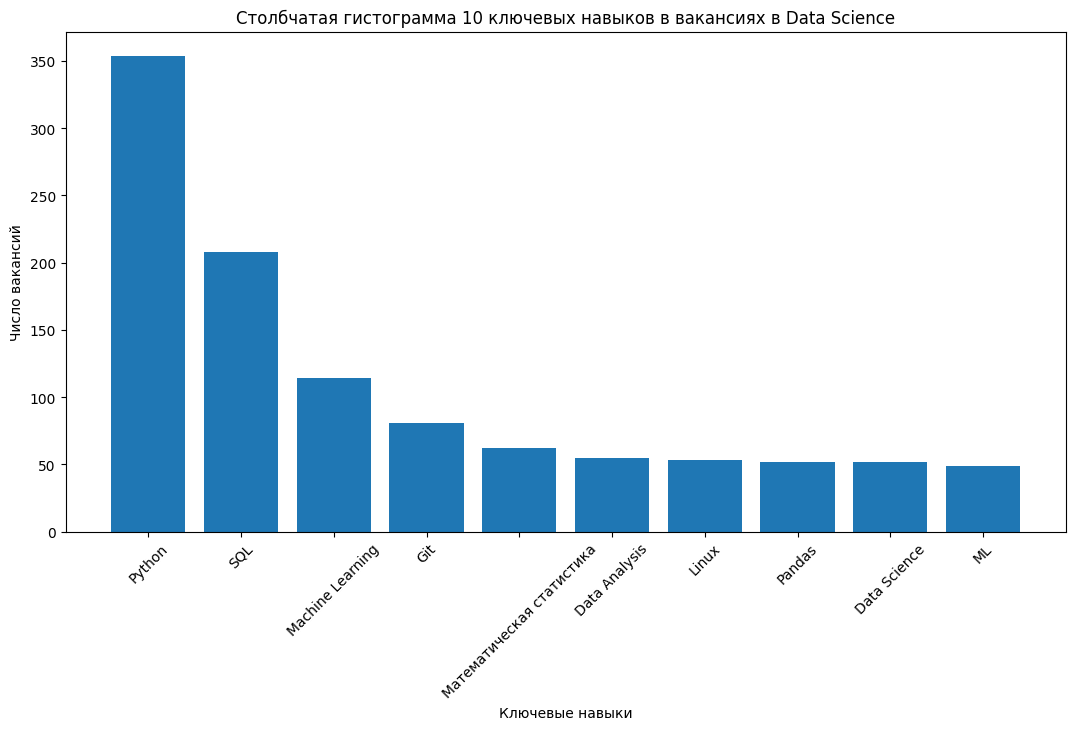

In [28]:
# Выполняем SQL-запрос для получения ключевых навыков из вакансий
query = f'''
SELECT 
    v.key_skills       -- Выбор ключевых навыков
FROM 
    vacancies v
WHERE 
    (
        LOWER(v.name) LIKE '%data scientist%'          -- Паттерны поиска вакансий для DS
        OR LOWER(v.name) LIKE '%data science%'
        OR LOWER(v.name) LIKE '%исследователь данных%'
        OR (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%') 
        OR LOWER(v.name) LIKE '%machine learning%'
        OR LOWER(v.name) LIKE '%машинн%обучен%'
    )
    AND v.key_skills IS NOT NULL
'''
# Выполняем запрос и получаем результат в DataFrame
df = pd.read_sql_query(query, connection)
# Разделяем ключевые навыки по табуляции - "\t"
df_of_key_skills = [skills.split("\t") for skills in df['key_skills']]
# Преобразуем список списков в один плоский список
df_of_key_skills_flat = sum(df_of_key_skills, [])
# Подсчитываем частоту каждого ключевого навыка с помощью Counter
skills_counter = Counter()
for key_skill in df_of_key_skills_flat:
    skills_counter[key_skill] += 1
# Преобразуем счетчик в DataFrame
skills_df = pd.DataFrame(skills_counter.items(), columns=['Skill', 'Frequency'])
# Сортируем по частоте и выбираем 10 самых популярных навыков
skills_df = skills_df.sort_values(by='Frequency', ascending=False).head(10)

# Создание графика (гистограмма) для 10 самых популярных навыков
fig = plt.figure(figsize=(10, 5))    # Устанавливаем размер графика
axes = fig.add_axes([0, 0, 1, 1])    # Устанавливаем оси графика
# Строим солбчатую диаграмму
res = axes.bar(x=skills_df['Skill'], height=skills_df['Frequency'])

# Названия и подписи осей
plt.title('Столбчатая гистограмма 10 ключевых навыков в вакансиях в Data Science')
plt.xlabel('Ключевые навыки')
plt.tick_params('x', rotation=45)   # Поворот подписей оси X для удобства
plt.ylabel('Число вакансий')

# Показать график
plt.show()

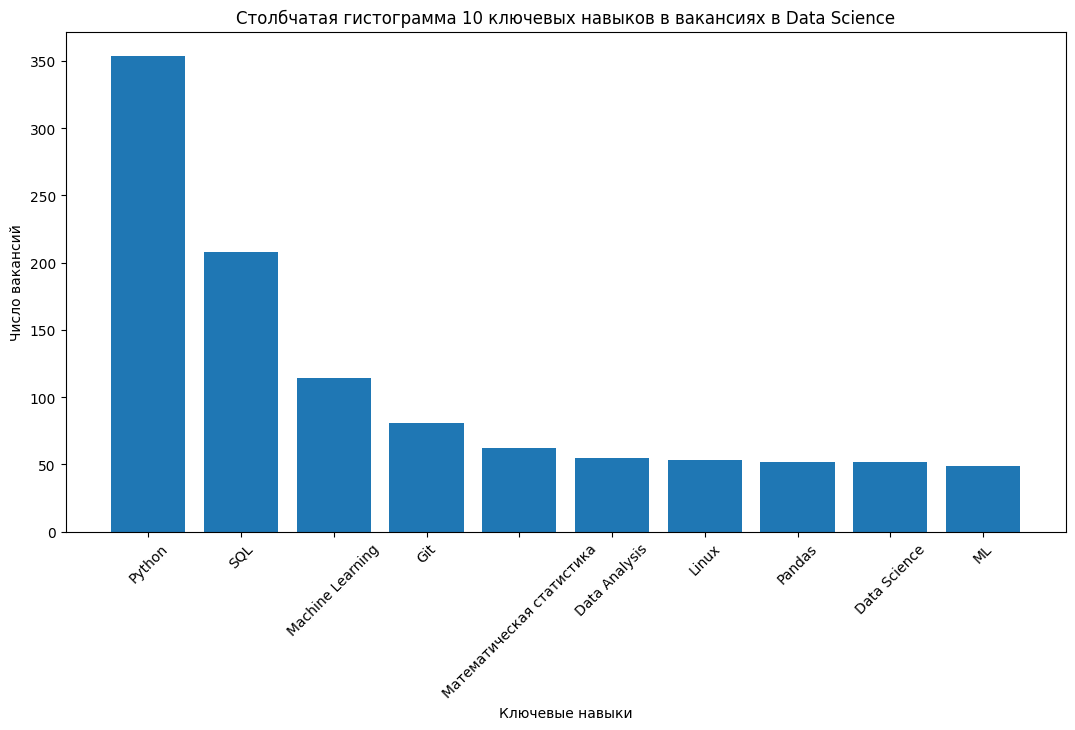

**Результаты и интерпретация**  

На основе столбчатой гистограммы можно сделать следующие выводы:  

1. **Ключевые навыки для Data Science**:
   В большинстве вакансий для специалистов в области Data Science чаще всего требуются такие навыки, как:  
   - **Python** — один из основных языков программирования для анализа данных;  
   - **SQL** — важный инструмент для работы с базами данных;
   - **Machine Learning** и **ML** — знания в области машинного обучения; 
   - **Git** — система контроля версий, необходимая для командной работы; 
   - **Математическая статистика**;

2. **Неточности метода**:
   - В данных присутствуют **навыки, указанные разными способами**, например, **Machine Learning** и **ML**. Хотя они обозначают одно и то же, они учитываются как разные признаки, что требует дополнительного анализа;  
   - **Разница в числе упоминаний** некоторых навыков (например, для Python: 357 упоминаний при использовании метода `LIKE` против 354 в данном подходе) объясняется различиями в способах записи. Например, такие варианты, как "Iron Python" или "Python + версия", могут приводить к незначительным расхождениям.

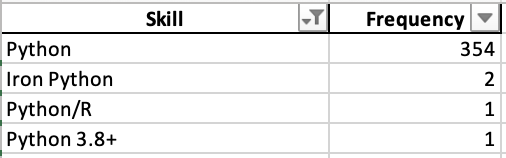
 
Несмотря на небольшие неточности, данный анализ позволил выявить основные тенденции и самые востребованные навыки в области Data Science. Это подтверждает, что навыки программирования, работы с данными и математический анализ играют ключевую роль в обласьт наук о данных. 

## Анализ зарплат DS по регионам

- Исследовать распределение средней заработной платы в разных регионах;
- Построить гистограмму распределения средней заработной платы DS по регионам;

/var/folders/gg/ypfqxl792w1dxtmn5g8btp6r0000gn/T/ipykernel_44100/54734247.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salary = pd.read_sql_query(query_salary, connection)


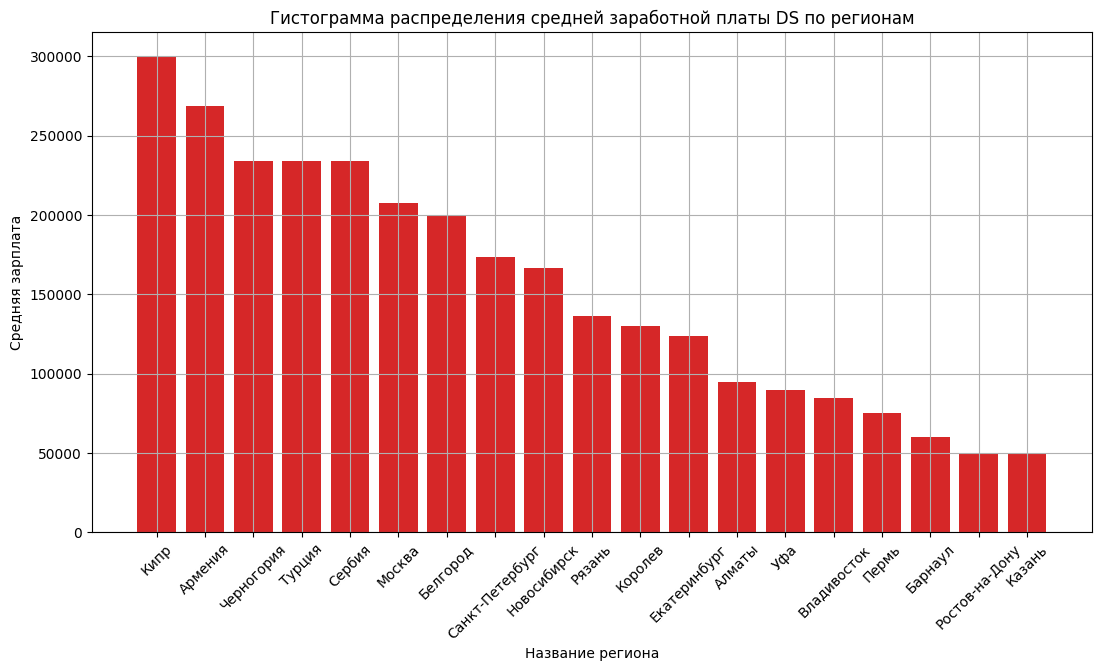

In [29]:
# SQL-запрос для извлечения средней зарплаты по регионам
query_salary = f'''
SELECT 
    a.name AS region,       -- Имя региона
    ROUND(AVG(COALESCE(
            -- Расчёт средней зарплаты для каждой вакансии (COALESCE, чтобы не было NULL)
            ((v.salary_from + v.salary_to) / 2),      -- Если обе зарплаты указаны, берём среднее значение
            v.salary_from,                            -- Если указана только минимальная зарплата, используем её
            v.salary_to                               -- Если указана только максимальная зарплата, используем её
            )), 0) AS avg_salary                      -- Округляем результат до целого числа
FROM
    vacancies AS v
JOIN 
    areas AS a ON v.area_id = a.id   -- Соединяем вакансии с регионами
WHERE 
        (LOWER(v.name) LIKE '%data scientist%'            -- Используем паттерны
        OR LOWER(v.name) LIKE '%data science%'
        OR LOWER(v.name) LIKE '%исследователь данных%'
        OR (v.name LIKE '%ML%' AND LOWER(v.name) NOT LIKE '%html%')
        OR LOWER(v.name) LIKE '%machine learning%'
        OR LOWER(v.name) LIKE '%машинн%обучен%')
        -- Проверяем, что заполнено хотя бы одно из полей с зарплатой
        AND (v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL)
GROUP BY a.name  -- Группируем результаты по регионам
ORDER BY avg_salary DESC -- Сортируем по средней зарплате по убыванию
'''
# Выполняем запрос и сохраняем результаты в DataFrame
df_salary = pd.read_sql_query(query_salary, connection)

# Создание графика 
fig = plt.figure(figsize=(10, 5))    # Устанавливаем размер графика
axes = fig.add_axes([0, 0, 1, 1])    # Устанавливаем оси графика
# Строим солбчатую диаграмму
res = axes.bar(x=df_salary['region'], height=df_salary['avg_salary'], color='tab:red')

# Названия и подписи осей
plt.title('Гистограмма распределения средней заработной платы DS по регионам')
plt.xlabel('Название региона')
plt.tick_params('x', rotation=45)   # Поворот подписей оси X для удобства
plt.ylabel('Средняя зарплата')
plt.grid()

# Показать график
plt.show()


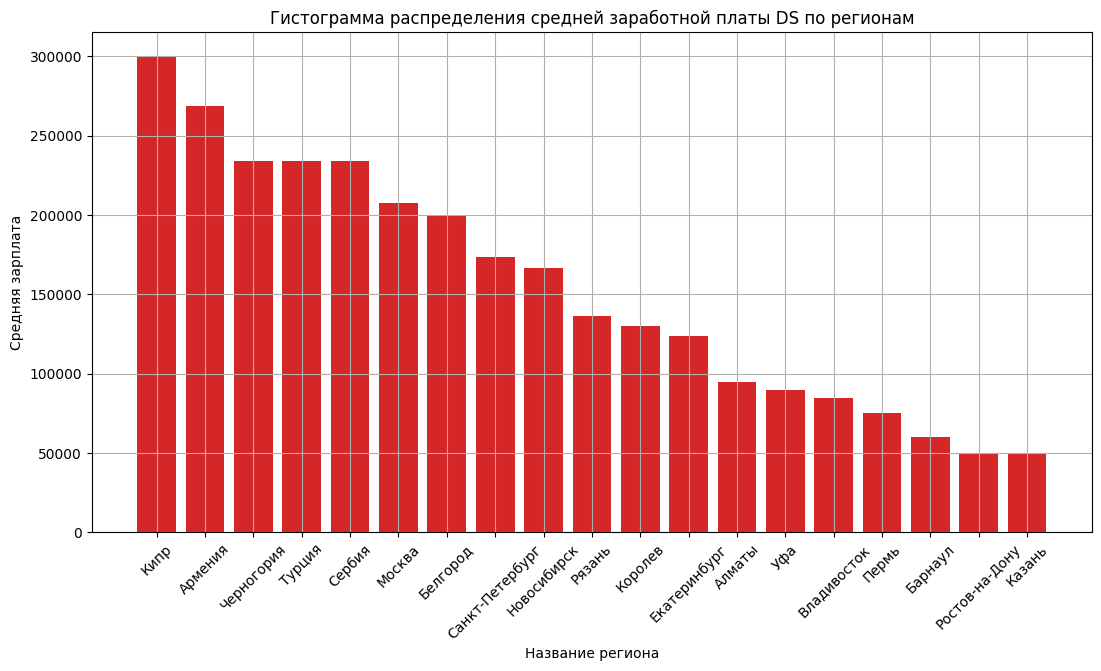

**Результаты:**

- На первом месте находится **Кипр**, где средняя заработная плата наиболее высокая, превышая 300 000, следом идут **Армения**, **Черногория** и **Турция**;
- **Москва** находится в средней части графика, но значительно **выделяется среди российских регионов**; 
- **Санкт-Петербург** также входит в список, однако он **немного уступает Москве**;
- Интересно, что **средняя заработная плата в Белгороде** практически сравнима **с московскими**;
- Более **высокие зарплаты** в **международных регионах** показывают, что **работа в международных компаниях** остаётся выгоднее, чем в местных.

In [30]:
# Закрываем соединение после окончания работы
connection.close()